In [ ]:
# Gabriel Aparecido Cassalho Xavier - RM99794
# Gustavo Vegi - RM550188
# Lucas Rodrigues Delfino - RM550196
# Luísa Cristina dos Santos Neves - RM551889
# Pedro Henrique Silva de Morais - RM98804

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, pearsonr
from scipy.stats import f_oneway

In [3]:
dados = pd.read_csv('obitos-2024.csv')
len(dados.columns)

# 6 colunas 

6

In [4]:
#Eststisticas descritivas

# Tipos de variáveis e valores nulos
dados.info()

# Descrição estatística das variáveis numéricas
dados.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11335 entries, 0 to 11334
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            11335 non-null  object
 1   tipo_doenca   11335 non-null  object
 2   local_obito   11335 non-null  object
 3   faixa_etaria  11335 non-null  object
 4   sexo          11335 non-null  object
 5   total         11335 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 531.5+ KB


,total
count,11335.000000
mean,53.933392
std,231.678901
min,1.000000
25%,1.000000
50%,5.000000
75%,23.000000
max,6142.000000


In [9]:
data_description = dados.describe(include='all')
data_description

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
count,11335,11335,11335,11335,11335,11335.000000
unique,27,7,9,12,3,NaN
top,SP,OUTRAS,HOSPITAL,80 - 89,M,NaN
freq,767,3328,3680,1332,5795,NaN
mean,NaN,NaN,NaN,NaN,NaN,53.933392
std,NaN,NaN,NaN,NaN,NaN,231.678901
min,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,23.000000


In [15]:
# Estatísticas descritivas por UF
uf_stats = dados.groupby('uf')['total'].describe()
uf_stats



,count,mean,std,min,25%,50%,75%,max
uf,,,,,,,,
AC,216.0,8.078704,11.164658,1.0,1.00,2.5,10.00,54.0
AL,388.0,21.938144,44.124340,1.0,1.00,4.0,16.00,283.0
AM,314.0,22.340764,43.260137,1.0,1.25,4.0,19.75,301.0
AP,195.0,5.738462,7.656835,1.0,1.00,2.0,7.00,45.0
BA,556.0,63.314748,163.503180,1.0,2.00,6.0,33.00,1200.0
CE,539.0,43.408163,104.291397,1.0,2.00,6.0,25.50,653.0
DF,352.0,22.815341,48.372398,1.0,2.00,4.0,13.00,272.0
ES,371.0,32.757412,70.270638,1.0,2.00,5.0,25.00,484.0
GO,531.0,33.523540,75.187971,1.0,2.00,6.0,27.00,522.0


In [11]:
# Estatísticas descritivas por Tipo de Doença
tipo_doenca_stats = dados.groupby('tipo_doenca')['total'].describe()
tipo_doenca_stats

,count,mean,std,min,25%,50%,75%,max
tipo_doenca,,,,,,,,
COVID,659.0,5.515933,14.262763,1.0,1.0,2.0,4.0,163.0
INDETERMINADA,977.0,4.534289,7.852450,1.0,1.0,2.0,4.0,77.0
INSUFICIENCIA_RESPIRATORIA,1978.0,24.656724,76.721517,1.0,1.0,4.0,17.0,1189.0
OUTRAS,3328.0,97.946815,331.356956,1.0,3.0,12.0,58.0,6142.0
PNEUMONIA,1990.0,61.847236,262.202010,1.0,2.0,6.0,27.0,4548.0
SEPTICEMIA,1789.0,57.876467,212.400470,1.0,2.0,5.0,26.0,3258.0
SRAG,614.0,3.118893,4.067602,1.0,1.0,2.0,3.0,37.0


In [12]:
# Estatísticas descritivas por Local do Óbito
local_obito_stats = dados.groupby('local_obito')['total'].describe()
local_obito_stats



,count,mean,std,min,25%,50%,75%,max
local_obito,,,,,,,,
AMBULANCIA,59.0,1.186441,0.706487,1.0,1.0,1.0,1.0,6.0
DOMICILIO,2379.0,47.505675,165.401124,1.0,2.0,6.0,24.0,2366.0
HOSPITAL,3680.0,116.571467,372.986697,1.0,3.0,14.0,73.0,6142.0
IGNORADO,992.0,8.868952,26.895038,1.0,1.0,2.0,6.0,459.0
OUTRO,1558.0,9.824134,25.393826,1.0,1.0,2.0,7.0,355.0
OUTROS_SERVICOS_SAUDE,1744.0,21.239106,57.410087,1.0,1.0,4.0,15.0,679.0
POSTO_SAUDE,109.0,2.238532,2.324981,1.0,1.0,1.0,2.0,14.0
SAMU,5.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
VIA_PUBLICA,809.0,9.730532,25.249479,1.0,1.0,2.0,8.0,306.0


In [13]:
faixa_etaria_stats = dados.groupby('faixa_etaria')['total'].describe()
faixa_etaria_stats


,count,mean,std,min,25%,50%,75%,max
faixa_etaria,,,,,,,,
10 - 19,549.0,7.131148,14.461032,1.0,1.0,2.0,7.00,187.0
20 - 29,769.0,14.680104,37.722591,1.0,1.0,3.0,13.00,629.0
30 - 39,906.0,20.727373,58.554028,1.0,1.0,3.5,16.00,1005.0
40 - 49,1039.0,34.229066,106.735693,1.0,2.0,5.0,22.00,1882.0
50 - 59,1157.0,54.042351,187.361947,1.0,2.0,6.0,28.00,3520.0
60 - 69,1258.0,85.601749,312.812386,1.0,2.0,7.0,37.00,5809.0
70 - 79,1305.0,105.954789,381.922324,1.0,2.0,8.0,44.00,6142.0
80 - 89,1332.0,101.117117,359.313767,1.0,2.0,7.5,45.00,5277.0
90 - 99,1098.0,60.307832,204.007297,1.0,2.0,6.5,32.75,3250.0


In [14]:

# Estatísticas descritivas por Sexo
sexo_stats = dados.groupby('sexo')['total'].describe()
sexo_stats

,count,mean,std,min,25%,50%,75%,max
sexo,,,,,,,,
F,5284.0,54.302612,232.251648,1.0,1.0,5.0,22.00,5400.0
I,256.0,11.277344,45.356164,1.0,1.0,1.0,3.25,459.0
M,5795.0,55.481104,235.881763,1.0,1.0,5.0,25.00,6142.0


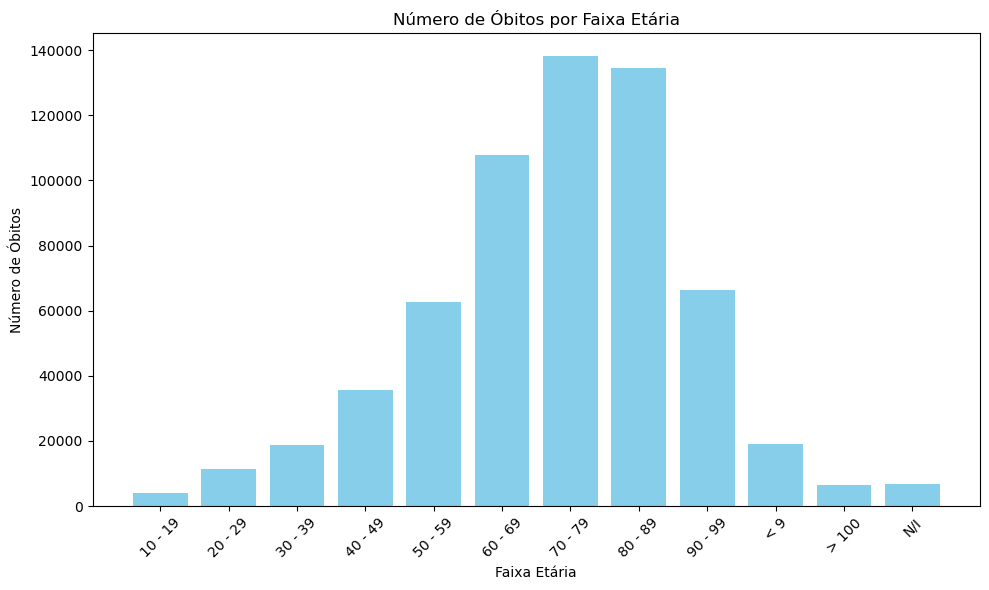

In [16]:

# Agrupar os dados por faixa etária e somar os óbitos
faixa_etaria = dados.groupby('faixa_etaria')['total'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(faixa_etaria['faixa_etaria'], faixa_etaria['total'], color='skyblue')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Óbitos')
plt.title('Número de Óbitos por Faixa Etária')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


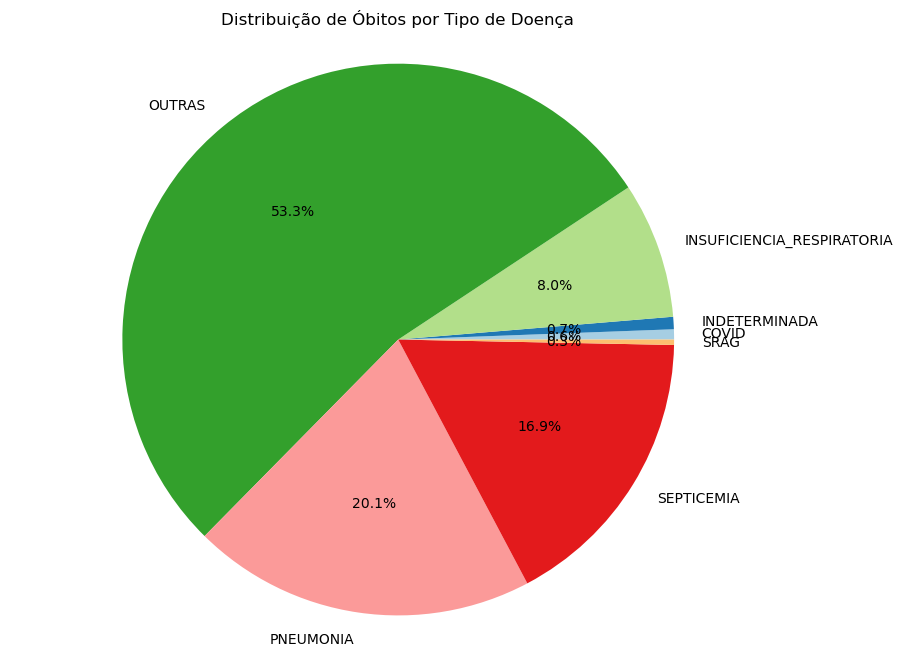

In [18]:
# Agrupar os dados por tipo de doença e somar os óbitos
tipo_doenca = dados.groupby('tipo_doenca')['total'].sum()

# Criar o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(tipo_doenca, labels=tipo_doenca.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(tipo_doenca))))
plt.title('Distribuição de Óbitos por Tipo de Doença')
plt.axis('equal')
plt.show()


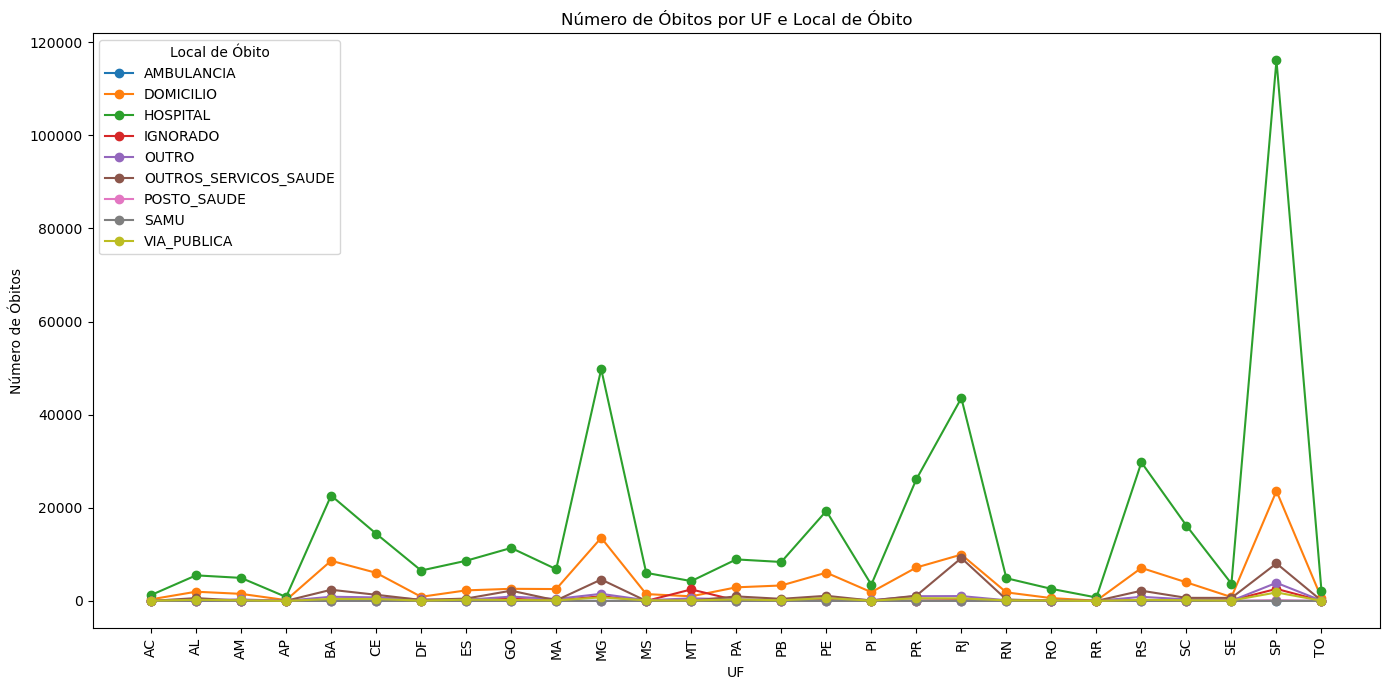

In [19]:
# Agrupar os dados por UF e local de óbito, somando os totais
uf_local_obito = dados.groupby(['uf', 'local_obito'])['total'].sum().unstack().fillna(0)

# Criar o gráfico de linhas
plt.figure(figsize=(14, 7))
for column in uf_local_obito.columns:
    plt.plot(uf_local_obito.index, uf_local_obito[column], marker='o', label=column)

plt.xlabel('UF')
plt.ylabel('Número de Óbitos')
plt.title('Número de Óbitos por UF e Local de Óbito')
plt.legend(title='Local de Óbito')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [20]:
# Teste de Hipótese 1: Diferença no número de óbitos por sexo

# Agrupando os dados por sexo e somando os totais de óbitos
grouped_sexo = dados.groupby('sexo')['total'].sum()

# Separando os dados por sexo
female_obitos = dados[dados['sexo'] == 'F']['total']
male_obitos = dados[dados['sexo'] == 'M']['total']

# Teste T para comparar médias de dois grupos independentes
t_stat_sexo, p_value_sexo = ttest_ind(female_obitos, male_obitos)

(t_stat_sexo, p_value_sexo)


(-0.26459203269807624, 0.7913286812676734)

In [21]:
# Teste de Hipótese 2: Diferença no número de óbitos por local


# Agrupando os dados por local e somando os totais de óbitos
grouped_local = dados.groupby('local_obito')['total'].sum()

# Separando os dados por local
hospital_obitos = dados[dados['local_obito'] == 'HOSPITAL']['total']
domicilio_obitos = dados[dados['local_obito'] == 'DOMICILIO']['total']
outros_obitos = dados[dados['local_obito'] == 'OUTROS']['total'] if 'OUTROS' in dados['local_obito'].unique() else pd.Series()

# Teste ANOVA para comparar as médias de mais de dois grupos independentes
anova_data_local = [hospital_obitos, domicilio_obitos] + ([outros_obitos] if not outros_obitos.empty else [])
f_stat_local, p_value_local = f_oneway(*anova_data_local)

(f_stat_local, p_value_local)


C:\Users\user\AppData\Local\Temp\ipykernel_11028\2299186649.py:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  outros_obitos = dados[dados['local_obito'] == 'OUTROS']['total'] if 'OUTROS' in dados['local_obito'].unique() else pd.Series()


(72.36739602239524, 2.2267875142191586e-17)

In [22]:
# Teste de Hipótese 3: Diferença no número de óbitos por faixa etária

# Agrupando os dados por faixa etária e somando os totais de óbitos
grouped_faixa_etaria = dados.groupby('faixa_etaria')['total'].sum()

# Separando os dados por faixa etária
faixa_etaria_data = [dados[dados['faixa_etaria'] == faixa]['total'] for faixa in dados['faixa_etaria'].unique()]

# Teste ANOVA para comparar as médias de mais de dois grupos independentes
f_stat_faixa_etaria, p_value_faixa_etaria = f_oneway(*faixa_etaria_data)

(f_stat_faixa_etaria, p_value_faixa_etaria)


(24.770853798185986, 2.4378726357326926e-51)